# <span style="font-size: 28px;"><b>Moving Averages and Exponential Smoothing</b></span>

## **Step 1: Load the Dataset**

In [ ]:
pip install pandas pyodbc matplotlib

In [ ]:
import pandas as pd
import pyodbc
import matplotlib.pyplot as plt

In [ ]:
server = 'SQLEXPRESS'
database = 'Transactions'
driver= '{SQL Server}'
trusted= 'yes'

# Connection string
conn_str = f'DRIVER={driver};SERVER={server};DATABASE={database};Trusted_Connection={trusted}'

# Connect to the database
conn = pyodbc.connect(conn_str)
cursor = conn.cursor()

query = '''
SELECT transaction_id, customer_id, 
       CAST(date AS DATE) as date, 
       CAST(time AS TIME) as time, 
       product_name, category, quantity, price
FROM [Transactions].[dbo].[Transactions]
'''
df = pd.read_sql_query(query, conn)

## **Step 2: Apply Moving Averages**

In [ ]:
# Calculate a 7-day moving average
df['7_day_MA'] = df['price'].rolling(window=7).mean()

# Calculate a 30-day moving average for a broader view
df['30_day_MA'] = df['price'].rolling(window=30).mean()

## **Step 3:** **Apply Exponential Smoothing**

In [ ]:
# Apply simple exponential smoothing
df['Exp_Smooth'] = df['price'].ewm(alpha=0.3).mean()

## **Step 4:** **Visualization**

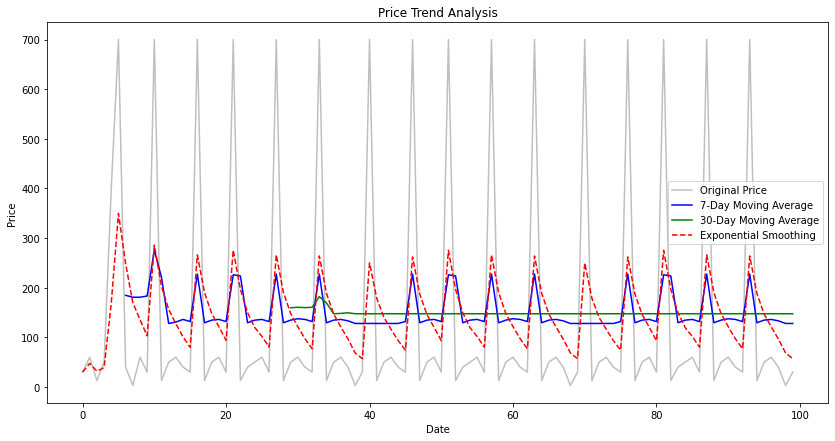

In [6]:
plt.figure(figsize=(14, 7))
plt.plot(df.index, df['price'], label='Original Price', alpha=0.5, color='gray')
plt.plot(df.index, df['7_day_MA'], label='7-Day Moving Average', color='blue')
plt.plot(df.index, df['30_day_MA'], label='30-Day Moving Average', color='green')
plt.plot(df.index, df['Exp_Smooth'], label='Exponential Smoothing', color='red', linestyle='--')
plt.legend()
plt.title('Price Trend Analysis')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()